# Rice Prediction:CNN Moudle 

# Prepare data

## read data

In [ ]:
# import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
import pandas as pd 
from numpy import genfromtxt

In [ ]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
#pillow image manipulation library
from PIL import Image

#display funtion to present the image inline in Jupyter
from IPython.display import display

#path to figures directory
figuresPath = '/content/rice/'

# /content/drive/MyDrive/Colab Notebooks/data/rice/train_img/Arborio/Arborio (1).jpg

### X_train,y_train

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/data/rice.zip"

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: rice/train_img/img-9055.jpg  
  inflating: __MACOSX/rice/train_img/._img-9055.jpg  
  inflating: rice/train_img/img-6366.jpg  
  inflating: __MACOSX/rice/train_img/._img-6366.jpg  
  inflating: rice/train_img/img-1409.jpg  
  inflating: __MACOSX/rice/train_img/._img-1409.jpg  
  inflating: rice/train_img/img-7078.jpg  
  inflating: __MACOSX/rice/train_img/._img-7078.jpg  
  inflating: rice/train_img/img-9041.jpg  
  inflating: __MACOSX/rice/train_img/._img-9041.jpg  
  inflating: rice/train_img/img-6372.jpg  
  inflating: __MACOSX/rice/train_img/._img-6372.jpg  
  inflating: rice/train_img/img-4565.jpg  
  inflating: __MACOSX/rice/train_img/._img-4565.jpg  
  inflating: rice/train_img/img-963.jpg  
  inflating: __MACOSX/rice/train_img/._img-963.jpg  
  inflating: rice/train_img/img-2114.jpg  
  inflating: __MACOSX/rice/train_img/._img-2114.jpg  
  inflating: rice/train_img/img-2672.jpg  
  inflating: __MACOSX/rice/train_img/._img-2672.jpg  
  inf

In [ ]:
X_train = []
y_train = pd.read_csv("/content/rice/train_label.csv")

# train-test
for i in range(10000):
  i = i+1
  train_img = Image.open(figuresPath + 'train_img/img-' + str(i) +'.jpg').convert('L')
  tri = np.array(train_img)
  X_train.append(tri)

#  print(array)
X_train=np.array(X_train)
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
X_train.shape

(10000, 250, 250)

In [ ]:
y_train.shape

(10000, 1)

In [ ]:
# Convert the data of English characters into five integer labels of 0-4
y_train_num = y_train.copy()
count = 0

for i in y_train_num['train_label']:
  if i == 'Arborio':
     y_train_num.loc[count] = 0
  elif i == 'Basmati':
     y_train_num.loc[count] = 1
  elif i == 'Ipsala':
     y_train_num.loc[count] = 2
  elif i == 'Jasmine':
     y_train_num.loc[count] = 3
  else:
     y_train_num.loc[count] = 4

  count = count+1

y_train_num

,train_label
0,0
1,0
2,0
3,0
4,0
...,...
9995,4
9996,4
9997,4
9998,4


In [ ]:
y_train_num.shape

(10000, 1)

In [ ]:
list1 = y_train_num['train_label']
#for i in y_train_num['Arborio']:
  #list1.append(i)

list1.tolist()
y_train_num = np.array(list1)
y_train_num

array([0, 0, 0, ..., 4, 4, 4], dtype=object)

In [ ]:
y_train_num = y_train_num.astype(np.uint8)

In [ ]:
y_train_num.dtype

dtype('uint8')

#### Both x_train and y_train are ready

### X_test,y_train

In [ ]:
X_test = []
y_test = pd.read_csv("/content/rice/test_label.csv")

In [ ]:
# test-img
for i in range(2000):
  i = i+1
  test_img = Image.open(figuresPath + 'test_img/img-' + str(i) +'.jpg').convert('L')
  ti = np.array(test_img)
  X_test.append(ti)

#  print(array)
X_test = np.array(X_test)
print(X_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
X_test.shape

(2000, 250, 250)

In [ ]:
# label 
y_test_num = y_test.copy()
count = 0

for i in y_test_num['test_label']:
  if i == 'Arborio':
     y_test_num.loc[count] = 0
  elif i == 'Basmati':
     y_test_num.loc[count] = 1
  elif i == 'Ipsala':
     y_test_num.loc[count] = 2
  elif i == 'Jasmine':
     y_test_num.loc[count] = 3
  else:
     y_test_num.loc[count] = 4

  count = count+1

y_test_num

,test_label
0,0
1,0
2,0
3,0
4,0
...,...
1995,4
1996,4
1997,4
1998,4


In [ ]:
y_test.shape

(2000, 1)

In [ ]:
list1 = y_test_num['test_label']

list1.tolist()
y_test_num = np.array(list1)
y_test_num

array([0, 0, 0, ..., 4, 4, 4], dtype=object)

In [ ]:
y_test_num = y_test_num.astype(np.uint8)


## processing data

In [ ]:
# Normalize the images. Normalize pixel values to a value between -0.5 and 0.5
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Reshape the images.
X_train = np.expand_dims(X_train, axis=3) # add one more dimension The original picture is two-dimensional, 250*250, adding a latitude
X_test = np.expand_dims(X_test, axis=3)
print(X_train.shape)
print(X_test.shape)

(10000, 250, 250, 1)
(2000, 250, 250, 1)


# Modeling

In [ ]:
num_filters = 8 # The number of convolution kernels
filter_size = 3 # The size of the convolution kernel is 3*3
pool_size = 2 # The window size of the maximum pooling will take the maximum value in the 2*2 window

# Build the model.
model = keras.models.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(250, 250, 1)),
  keras.layers.MaxPooling2D(pool_size=pool_size), # strides is not defined (stride, the default is the value of pool_size, 2 steps each time)
  keras.layers.Flatten(),
  keras.layers.Dense(5, activation='softmax'), # Convert the output dimension to 5, softmax can be normalized
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train, # x,input data
  keras.utils.to_categorical(y_train_num), # y,Input data, but because it is an integer array, this method is needed to convert to 5 dimensions
  epochs=5, # A total of 5 rounds of training
  validation_data=(X_test, keras.utils.to_categorical(y_test_num)), # Specify the validation set, which is a tuple(x,y)
)

Epoch 1/5
313/313 [==============================] - 153s 487ms/step - loss: 0.7257 - accuracy: 0.8755 - val_loss: 0.0912 - val_accuracy: 0.9720
Epoch 2/5
313/313 [==============================] - 151s 483ms/step - loss: 0.0985 - accuracy: 0.9675 - val_loss: 0.1245 - val_accuracy: 0.9585
Epoch 3/5
313/313 [==============================] - 161s 514ms/step - loss: 0.0743 - accuracy: 0.9750 - val_loss: 0.1033 - val_accuracy: 0.9635
Epoch 4/5
313/313 [==============================] - 153s 491ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.1040 - val_accuracy: 0.9615
Epoch 5/5
313/313 [==============================] - 158s 503ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0645 - val_accuracy: 0.9730


In [ ]:
def visualization(x):
  # plotting the metrics
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(x.history['accuracy'])
  plt.plot(x.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(x.history['loss'])
  plt.plot(x.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper right')

  plt.tight_layout()

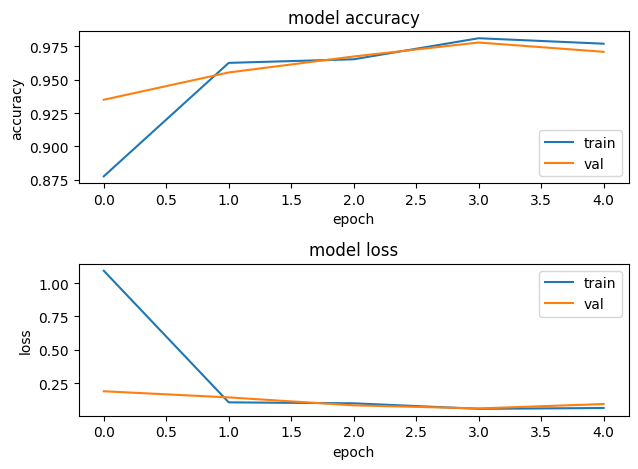

In [ ]:
visualization(history)

In [ ]:
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 14s 221ms/step - loss: 0.0645 - accuracy: 0.9730


[0.06445802748203278, 0.9729999899864197]

63/63 [==============================] - 10s 164ms/step


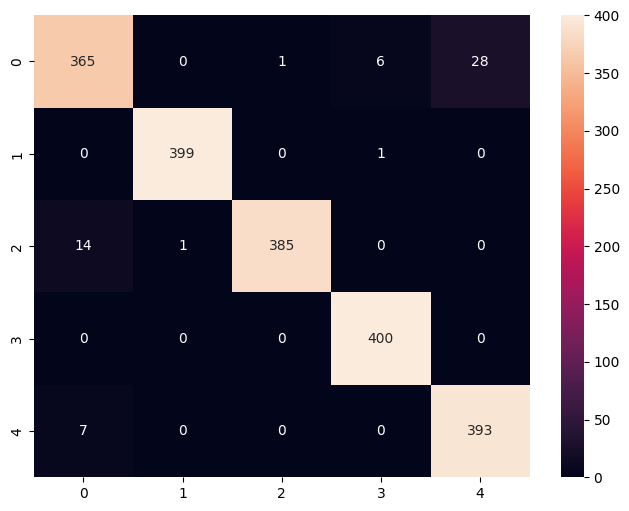

In [ ]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_test)
Y_pred_classes = np.argmax(Y_prediction, axis=1) # axis=1 returns the indices with max value of each prediction
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_num, Y_pred_classes) 

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d") # fmt='d': Annotate each cell with the numeric value using integer formatting
plt.show()

## training model

In [ ]:
model.save_weights('cnn.h5')

In [ ]:
num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = keras.models.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(250, 250, 1)),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Flatten(),
  keras.layers.Dense(5, activation='softmax'),
])

# Load the model from disk later using:
model.load_weights('cnn.h5')

In [ ]:
# Predict on the first 20 test images.
predictions = model.predict(X_test[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # axis=1 returns the indices with max value of each prediction

# Check our predictions against the ground truths.
print(y_test[:20]) 

1/1 [==============================] - 0s 222ms/step
[0 0 0 0 4 0 0 0 0 3 0 0 4 0 0 0 0 0 0 0]
   test_label
0     Arborio
1     Arborio
2     Arborio
3     Arborio
4     Arborio
5     Arborio
6     Arborio
7     Arborio
8     Arborio
9     Arborio
10    Arborio
11    Arborio
12    Arborio
13    Arborio
14    Arborio
15    Arborio
16    Arborio
17    Arborio
18    Arborio
19    Arborio


# Network Depth Add


In [ ]:
num_filters = 8 # The number of convolution kernels
filter_size = 3 # The size of the convolution kernel is 3*3
pool_size = 2 # The window size of the maximum pooling will take the maximum value in the 2*2 window

model = keras.models.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(250, 250, 1)),
  keras.layers.Conv2D(num_filters, filter_size),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Flatten(),
  keras.layers.Dense(5, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2 = model.fit(
  X_train,
  keras.utils.to_categorical(y_train_num),
  epochs=5,
  validation_data=(X_test, keras.utils.to_categorical(y_test_num)),
)

Epoch 1/5
313/313 [==============================] - 498s 2s/step - loss: 0.6777 - accuracy: 0.8891 - val_loss: 0.1289 - val_accuracy: 0.9525
Epoch 2/5
313/313 [==============================] - 498s 2s/step - loss: 0.1121 - accuracy: 0.9626 - val_loss: 0.1820 - val_accuracy: 0.9425
Epoch 3/5
313/313 [==============================] - 495s 2s/step - loss: 0.0815 - accuracy: 0.9716 - val_loss: 0.1024 - val_accuracy: 0.9675
Epoch 4/5
313/313 [==============================] - 497s 2s/step - loss: 0.0621 - accuracy: 0.9794 - val_loss: 0.1023 - val_accuracy: 0.9635
Epoch 5/5
313/313 [==============================] - 494s 2s/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0715 - val_accuracy: 0.9715


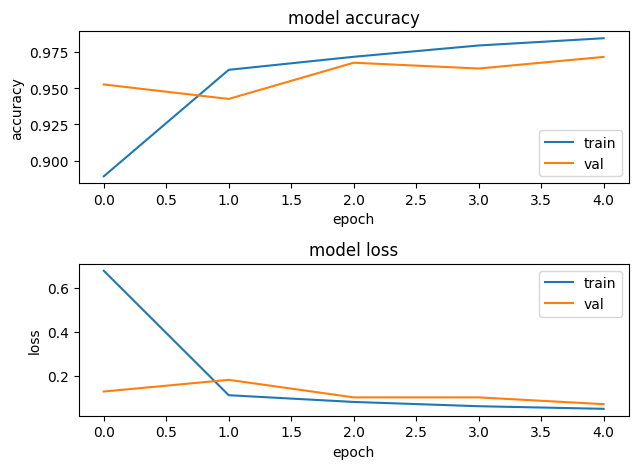

In [ ]:
visualization(history2)

In [ ]:
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 28s 449ms/step - loss: 0.0715 - accuracy: 0.9715


[0.07148866355419159, 0.9714999794960022]

# Network Depth Dropout

In [ ]:
num_filters = 8 # The number of convolution kernels
filter_size = 3 # The size of the convolution kernel is 3*3
pool_size = 2 # The window size of the maximum pooling will take the maximum value in the 2*2 window

model = keras.models.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(250, 250, 1)),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Dropout(0.5), # randomly drop 50% of units：随机丢弃50%的神经元，以减少过拟合的风险
  keras.layers.Flatten(),
  keras.layers.Dense(5, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history3 = model.fit(
  X_train,
  keras.utils.to_categorical(y_train_num),
  epochs=5,
  validation_data=(X_test, keras.utils.to_categorical(y_test_num)),
)

Epoch 1/5
313/313 [==============================] - 209s 662ms/step - loss: 0.5296 - accuracy: 0.8848 - val_loss: 0.1320 - val_accuracy: 0.9520
Epoch 2/5
313/313 [==============================] - 209s 666ms/step - loss: 0.1033 - accuracy: 0.9620 - val_loss: 0.1099 - val_accuracy: 0.9560
Epoch 3/5
313/313 [==============================] - 209s 667ms/step - loss: 0.0741 - accuracy: 0.9741 - val_loss: 0.0742 - val_accuracy: 0.9695
Epoch 4/5
313/313 [==============================] - 206s 657ms/step - loss: 0.0618 - accuracy: 0.9787 - val_loss: 0.0646 - val_accuracy: 0.9755
Epoch 5/5
313/313 [==============================] - 206s 659ms/step - loss: 0.0588 - accuracy: 0.9790 - val_loss: 0.0594 - val_accuracy: 0.9750


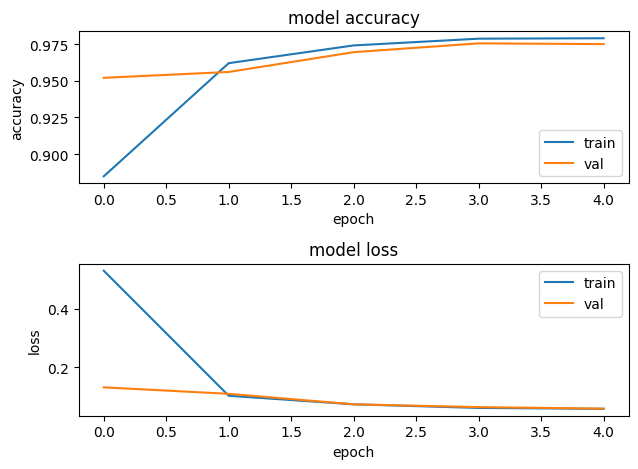

In [ ]:
visualization(history3)

In [ ]:
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 15s 232ms/step - loss: 0.0594 - accuracy: 0.9750


[0.0594017393887043, 0.9750000238418579]

# Fully-connected Layers

In [ ]:
num_filters = 8 # The number of convolution kernels
filter_size = 3 # The size of the convolution kernel is 3*3
pool_size = 2 # The window size of the maximum pooling will take the maximum value in the 2*2 window

model = keras.models.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(250, 250, 1)),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(5, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history4 = model.fit(
  X_train,
  keras.utils.to_categorical(y_train_num),
  epochs=5,
  validation_data=(X_test, keras.utils.to_categorical(y_test_num)),
)

Epoch 1/5
313/313 [==============================] - 235s 746ms/step - loss: 0.6468 - accuracy: 0.8299 - val_loss: 0.2201 - val_accuracy: 0.9225
Epoch 2/5
313/313 [==============================] - 233s 745ms/step - loss: 0.1316 - accuracy: 0.9601 - val_loss: 0.1449 - val_accuracy: 0.9560
Epoch 3/5
313/313 [==============================] - 230s 736ms/step - loss: 0.0834 - accuracy: 0.9732 - val_loss: 0.1808 - val_accuracy: 0.9390
Epoch 4/5
313/313 [==============================] - 232s 741ms/step - loss: 0.0725 - accuracy: 0.9746 - val_loss: 0.2198 - val_accuracy: 0.9450
Epoch 5/5
313/313 [==============================] - 233s 746ms/step - loss: 0.0575 - accuracy: 0.9813 - val_loss: 0.0777 - val_accuracy: 0.9725


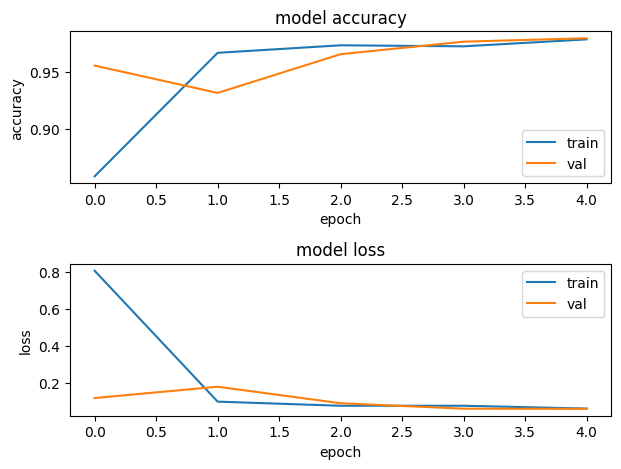

In [ ]:
visualization(history4)

In [ ]:
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 15s 239ms/step - loss: 0.0582 - accuracy: 0.9795


[0.05816351994872093, 0.9794999957084656]

# Convolution Parameters
Changed stride, added padding='same'


In [ ]:
num_filters = 10
filter_size = 2
pool_size = 2

model = keras.models.Sequential([
  keras.layers.Conv2D(
    num_filters,
    filter_size,
    input_shape=(250, 250, 1),
    strides=2,
    padding='same',
    activation='relu',  # If you don't specify anything, no activation is applied
  ),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Flatten(),
  keras.layers.Dense(5, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history5 = model.fit(
  X_train,
  keras.utils.to_categorical(y_train_num),
  epochs=5,
  validation_data=(X_test, keras.utils.to_categorical(y_test_num)),
)

Epoch 1/5
313/313 [==============================] - 51s 159ms/step - loss: 0.2459 - accuracy: 0.9235 - val_loss: 0.1255 - val_accuracy: 0.9540
Epoch 2/5
313/313 [==============================] - 55s 177ms/step - loss: 0.0765 - accuracy: 0.9741 - val_loss: 0.0916 - val_accuracy: 0.9665
Epoch 3/5
313/313 [==============================] - 50s 159ms/step - loss: 0.0811 - accuracy: 0.9707 - val_loss: 0.0779 - val_accuracy: 0.9700
Epoch 4/5
313/313 [==============================] - 50s 161ms/step - loss: 0.0585 - accuracy: 0.9804 - val_loss: 0.1321 - val_accuracy: 0.9610
Epoch 5/5
313/313 [==============================] - 50s 159ms/step - loss: 0.0490 - accuracy: 0.9830 - val_loss: 0.0625 - val_accuracy: 0.9740


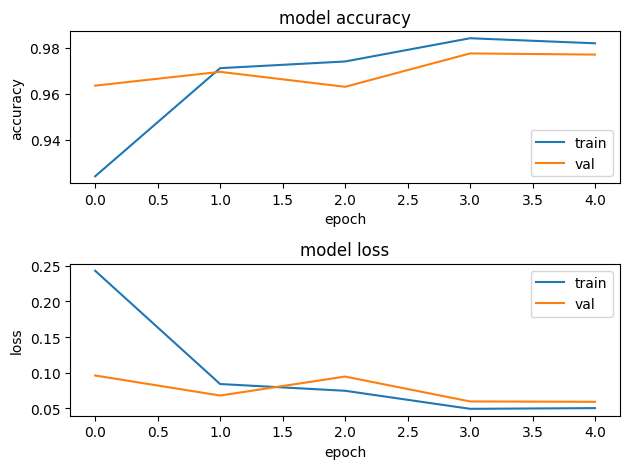

In [ ]:
visualization(history5)

In [ ]:
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test_num)
)

63/63 [==============================] - 4s 57ms/step - loss: 0.0592 - accuracy: 0.9770


[0.05923321098089218, 0.9769999980926514]

#Application
By comparing SimpleNN and its adjusted model with CNN and its adjusted model, we found that the accuracy of the CNN model with a fully connected layer is the highest, so we tried to import a picture that the model has never seen before. Let the model make predictions. The final prediction result is consistent with the ground truth.

In [ ]:
model.save_weights('cnn.h5')

In [ ]:
num_filters = 8 # The number of convolution kernels
filter_size = 3 # The size of the convolution kernel is 3*3
pool_size = 2 # The window size of the maximum pooling will take the maximum value in the 2*2 window

model = keras.models.Sequential([
  keras.layers.Conv2D(num_filters, filter_size, input_shape=(250, 250, 1)),
  keras.layers.MaxPooling2D(pool_size=pool_size),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(5, activation='softmax'),
])

# Load the model from disk later using:
model.load_weights('cnn.h5')

In [ ]:
plt.imshow(X_test[8][:,:,0])

In [ ]:
figuresPath1 = '/content/drive/MyDrive/Colab Notebooks/data/Ipsala (15000).jpg'

In [ ]:
def prediction(img):
  img = Image.open(img).convert('L')
  IMG = np.array(img)
  IMG = np.expand_dims(IMG, axis=0) 
  IMG = (IMG / 255) - 0.5
  test_IMG = np.expand_dims(IMG, axis=3) 

  predictions = model.predict(test_IMG)

  print(np.argmax(predictions, axis=1))

In [ ]:
prediction(figuresPath1)

1/1 [==============================] - 0s 51ms/step
[2]
